# Heart Failure Prediction with Machine Learning - MO444

Copyright (C) 2022 André Nóbrega, Douglas Yoshioka, Matheus Silva, Renan Alves, Taylla Theodoro.

<a href="mailto:a203758@dac.unicamp.br">a203758@dac.unicamp.br</a>


This program is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version.

This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details.

You should have received a copy of the GNU General Public License along with this program. If not, see http://www.gnu.org/licenses/.

![](https://drive.google.com/uc?export=view&id=1zZjpg45g99PfJ4GbumIpLfeqQo-dleT4)

### A Brief Introduction to the Problem

In Brazil, heart disease was responsible for 27\% of deaths in 2019. There are several indicators for heart disease, such as gender, age, socioeconomic status, location. Considering that immense amounts of population health data are generated daily, such data can be valuable for the creation of tools that are able to help health professionals to diagnose diseases quickly and reliably. Machine Learning is a statistical inference technique in which a certain task is learned by the computer from training data. Therefore, based on this principle, this work aims to use machine learning methods to predict the probability of a person having heart disease given indicators. For this, the dataset \textit{Key Indicators of Heart Disease} from the Kaggle website was chosen, where 400,000 adults were interviewed in 50 US states about possible indicators of heart disease. The dataset has 319,795 samples - with 18 variables, 17 of which are possible regressors and 1 target variable (existence or not of heart disease) - and was divided into 80\% for training, 20\% for validation. The dataset was explored and a feature selection was performed. The best dataset was chosen and model by two main approaches, traditional machine Leaning methods (Naive Classifier, Naive Bayes, Logistic Regression, Random Forest) and deep learning method (Fully Connected Neural Network). The models were trained and analysed in a set of metrics, considering that the dataset is imbalance, the most reliable metric is ROC-AUC. The model with the best ROC-AUC result was Random Forest, with 0.81, which we conclude that is the best model for this task and this dataset. 

### Summary <a class="anchor" id="topo"></a>

* [Part 0: Solving dependencies](#scrollTo=sV5ehn8tYwZS)
* [Part 1: Exploratory Data Analysis](#scrollTo=bLxHdRctSoqO)
* [Part 2: Data Processing and Feature Selection](#scrollTo=mAFFndSzS6qL)
* [Part 3: Metrics Definition and Baseline Model](#scrollTo=8GczQV41VThD)
* [Part 4: Model Training and Parameter Search](#scrollTo=nHkqlxGEJRcB)
* [Part 5: Experimenting with Neural Networks](#scrollTo=iI23kF7apy04)
* [Part 6: Comparing the Models](#scrollTo=DN2a0gbjis8g)
* [Part 7: Conclusions](#scrollTo=DN2a0gbjis8g)






### Part 0: Solving dependencies <a class="anchor" id="#parte_00"></a>

In this section, we import all of the necessary packages, used throughout this notebook


In [ ]:
# Builtin packages
import os

# Visualization and data manipulation
!pip install matplotlib==3.4
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# Sklearn data manipulation
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest

# Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow import keras

# Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, precision_score,recall_score, roc_auc_score, accuracy_score, roc_curve, confusion_matrix

import warnings
from sklearn.exceptions import DataConversionWarning, UndefinedMetricWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=UndefinedMetricWarning)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Part 1: Exploratory Data Analysis <a class="anchor" id="parte_01"></a>

In [ ]:
# Downloading data
!gdown --id 1F4UVOjSjVFp--nMo3-eCSrKMPPraAXRq

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1F4UVOjSjVFp--nMo3-eCSrKMPPraAXRq
To: /content/heart_2020_cleaned.csv
100% 25.2M/25.2M [00:00<00:00, 28.2MB/s]


In [ ]:
# First we would like to take a general look at the data

df = pd.read_csv('/content/heart_2020_cleaned.csv')
df.head().T

,0,1,2,3,4
HeartDisease,No,No,No,No,No
BMI,16.6,20.34,26.58,24.21,23.71
Smoking,Yes,No,Yes,No,No
AlcoholDrinking,No,No,No,No,No
Stroke,No,Yes,No,No,No
PhysicalHealth,3.0,0.0,20.0,0.0,28.0
MentalHealth,30.0,0.0,30.0,0.0,0.0
DiffWalking,No,No,No,No,Yes
Sex,Female,Female,Male,Female,Female
AgeCategory,55-59,80 or older,65-69,75-79,40-44


It is important to check the variable types, since it determines both the type of analysis that must be performed and the preprocessing steps.

In [ ]:
# Variable data types
categorical = [] # list of categorical variables
numerical   = [] # list of numerical variables

# Separating by tipe
for variable_name, variable_type in df.dtypes.iteritems():
  if variable_type == 'object':
    categorical.append(variable_name)
  else:
    numerical.append(variable_name)
  
# Printing variable data types
print('Categorical variables: ')
for i in categorical:
  print('* ', i)
print('#' * 100)
print('Numerical variables: ')
for i in numerical:
  print('* ', i)

Categorical variables: 
*  HeartDisease
*  Smoking
*  AlcoholDrinking
*  Stroke
*  DiffWalking
*  Sex
*  AgeCategory
*  Race
*  Diabetic
*  PhysicalActivity
*  GenHealth
*  Asthma
*  KidneyDisease
*  SkinCancer
####################################################################################################
Numerical variables: 
*  BMI
*  PhysicalHealth
*  MentalHealth
*  SleepTime


As we can see, there is a much larger number of categorical variables, than numerical. This means that we need to search for correlations using qualitative approaches, rather than quantitative.

Before diving into analyzing the single variables distribution, we can check the statistical description of the numerical variables.

In [ ]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


From the statistical description, we can notice a few outliers in all of these numerical fields. These values can be removed from the dataset before starting the training procedure.

It is also important to check the missing values, since those also need to be either removed or imputed before making model training.

In [ ]:
# missing values
print('Amount of missing values: ')
for field, n_nan in df.isnull().sum().iteritems():
  print(f'{field: <35}', f'{n_nan: >10}')

Amount of missing values: 
HeartDisease                                 0
BMI                                          0
Smoking                                      0
AlcoholDrinking                              0
Stroke                                       0
PhysicalHealth                               0
MentalHealth                                 0
DiffWalking                                  0
Sex                                          0
AgeCategory                                  0
Race                                         0
Diabetic                                     0
PhysicalActivity                             0
GenHealth                                    0
SleepTime                                    0
Asthma                                       0
KidneyDisease                                0
SkinCancer                                   0


#### Univariate Analysis

Next we are going to start perform the univariate analysis in order to understand the distribution of the categorical variables. This is especially important in the label (heart disease), since determines wether or not the dataset is imbalanced.

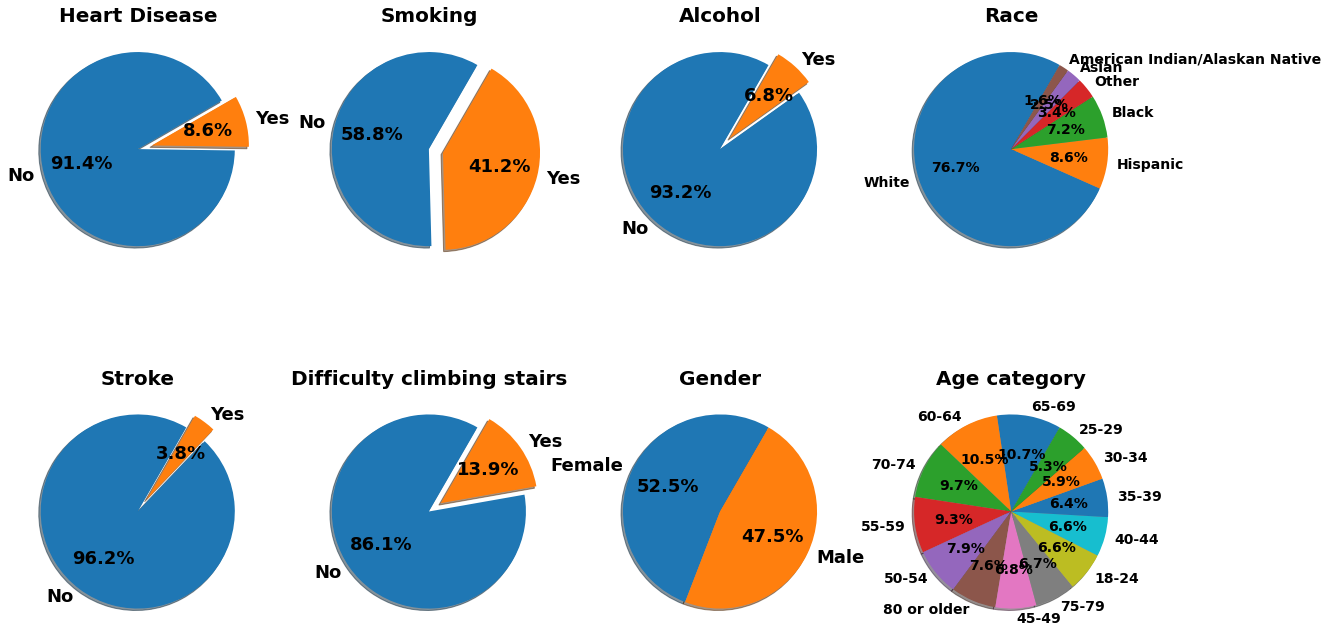

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

# Getting all the labels and sizes of the pie charts
labels = df['HeartDisease'].value_counts().index
sizes  = df['HeartDisease'].value_counts().values

smoking_labels = df['Smoking'].value_counts().index
smoking_sizes  = df['Smoking'].value_counts().values

alcohol_labels = df['AlcoholDrinking'].value_counts().index
alcohol_sizes  = df['AlcoholDrinking'].value_counts().values

stroke_labels = df['Stroke'].value_counts().index
stroke_sizes  = df['Stroke'].value_counts().values

DiffWalking_labels = df['DiffWalking'].value_counts().index
DiffWalking_sizes  = df['DiffWalking'].value_counts().values

Sex_labels = df['Sex'].value_counts().index
Sex_sizes  = df['Sex'].value_counts().values

AgeCategory_labels = df['AgeCategory'].value_counts().index
AgeCategory_sizes  = df['AgeCategory'].value_counts().values

Race_labels = df['Race'].value_counts().index
Race_sizes  = df['Race'].value_counts().values
explode = (0, 0.15)

# Plotting figure
fig1, ax = plt.subplots(figsize = (20,20), nrows = 2, ncols = 4)
ax[0][0].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=30, textprops={'fontsize': 18, 'fontweight': 'bold'})
ax[0][0].set_title('Heart Disease', fontsize = 20, fontweight = 'bold')

ax[0][1].pie(smoking_sizes, explode=explode, labels=smoking_labels, autopct='%1.1f%%',
        shadow=True, startangle=60, textprops={'fontsize': 18, 'fontweight': 'bold'})
ax[0][1].set_title('Smoking', fontsize = 20, fontweight = 'bold')

ax[0][2].pie(alcohol_sizes, explode=explode, labels=alcohol_labels, autopct='%1.1f%%',
        shadow=True, startangle=60, textprops={'fontsize': 18, 'fontweight': 'bold'})
ax[0][2].set_title('Alcohol', fontsize = 20, fontweight = 'bold')

ax[1][0].pie(stroke_sizes, explode=explode, labels=stroke_labels, autopct='%1.1f%%',
        shadow=True, startangle=60, textprops={'fontsize': 18, 'fontweight': 'bold'})
ax[1][0].set_title('Stroke', fontsize = 20, fontweight = 'bold')

ax[1][1].pie(DiffWalking_sizes, explode=explode, labels=DiffWalking_labels, autopct='%1.1f%%',
        shadow=True, startangle=60, textprops={'fontsize': 18, 'fontweight': 'bold'})
ax[1][1].set_title('Difficulty climbing stairs', fontsize = 20, fontweight = 'bold')

ax[1][2].pie(Sex_sizes, explode=None, labels=Sex_labels, autopct='%1.1f%%',
        shadow=True, startangle=60, textprops={'fontsize': 18, 'fontweight': 'bold'})
ax[1][2].set_title('Gender', fontsize = 20, fontweight = 'bold')

ax[1][3].pie(AgeCategory_sizes, explode=None, labels=AgeCategory_labels, autopct='%1.1f%%',
        shadow=True, startangle=60, textprops={'fontsize': 14, 'fontweight': 'bold'})
ax[1][3].set_title('Age category', fontsize = 20, fontweight = 'bold')

ax[0][3].pie(Race_sizes, explode=None, labels=Race_labels, autopct='%1.1f%%',
        shadow=True, startangle=60, textprops={'fontsize': 14, 'fontweight': 'bold'})
ax[0][3].set_title('Race', fontsize = 20, fontweight = 'bold')
plt.subplots_adjust(wspace=0.2, hspace=-0.5)

plt.show()


**Important Remarks**


*   We can see that the dataset is heavily imbalanced, with 91.4% of the entries presenting no heart diseases. We need to take that into account while building the Machine Learning Models.
*   There is no significant imbalance in the gender category. The race category, in the other hand, has a big majority of "White" values. This is an indicator that models trained using this dataset have a bias that needs to be disclaimed.
*    Only a few percent of people drink alcohol regularly. However, more than 40% of the people smokes.
*    There is a fairly regular distribution throughout the age category.



#### Bivariate Analysis - Exploring relationships with target

This is a very important section, since we try to determine which features most correlates with heart diseases using visualization techniques.

We start by trying to understanding how the presence of each categorical variable changes the heart disease distribution. Basically we are trying to answer the following questions:



*   How does the presence of heart diseases behave in the different age categories?
*   Does drinking alcohol and smoking cigarettes affect the probability of having heart diseases?
*   How do the presence of diabetes, strokes, kidney diseases, skin cancers and the general health of the person influences the chance of them having heart diseases?
*   Does the distribution of heart diseases changes depending on the Race?
*   Is the dificulty in climbing stairs a good indicator of heart diseases?



In [ ]:
# First we need to replace the string values in HeartDisease by integer values
cat_df = df.copy()
cat_df['HeartDisease'] = df['HeartDisease'].replace({'No': 0, 'Yes': 1})

# Grouping by age category
order = cat_df.groupby('AgeCategory').agg({'HeartDisease': 'sum'}).index


**How does the presence of heart diseases behave in the different age categories?**

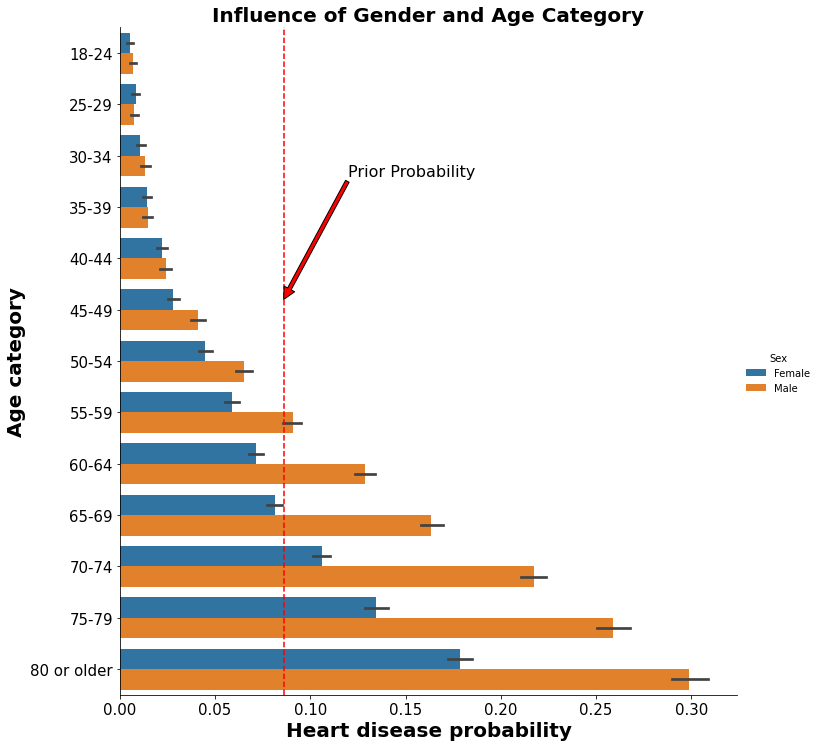

In [ ]:
p = sns.catplot(y="AgeCategory", x="HeartDisease", kind="bar",hue = 'Sex',  order = order , data=cat_df,
            height = 10, aspect = 1, )
plt.axvline(0.086, 0,1, color = 'r', linestyle = '--')
plt.title('Influence of Gender and Age Category', fontsize = 20, fontweight ='bold')
plt.xlabel('Heart disease probability', fontsize = 20, fontweight = 'bold')
plt.ylabel('Age category', fontsize = 20, fontweight = 'bold')
plt.tick_params(labelsize = 15, axis = 'both')
plt.annotate('Prior Probability', xy = (0.086, 4.8), 
             fontsize = 16, xytext = (0.12, 2.4), 
             arrowprops = dict(facecolor = 'red'),
             color = 'black')
plt.show()

As we could expect, heart diseases are much more likely in the older ages categories. They are also more present in the male population.

The last age category (80 or older) are almost 30x more likely to get heart diseases compared to the first group (18-24).

**Does drinking alcohol and smoking cigarettes affect the probability of having heart diseases?**

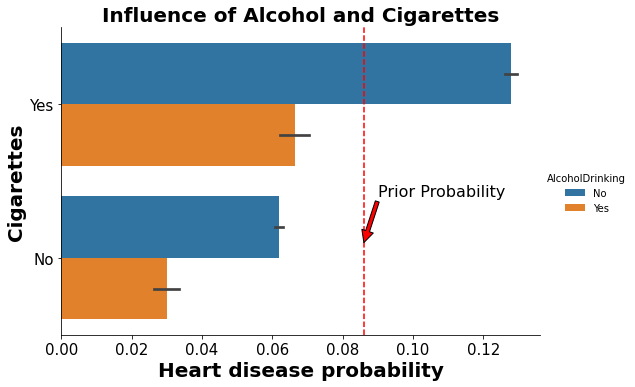

In [ ]:
sns.catplot(y="Smoking", x="HeartDisease",hue = 'AlcoholDrinking', kind="bar", data=cat_df,
            height = 5, aspect = 1.5)
plt.axvline(0.086, 0,1, color = 'r', linestyle = '--')
plt.title('Influence of Alcohol and Cigarettes', fontsize = 20, fontweight ='bold')
plt.xlabel('Heart disease probability', fontsize = 20, fontweight = 'bold')
plt.ylabel('Cigarettes', fontsize = 20, fontweight = 'bold')
plt.tick_params(labelsize = 15, axis = 'both')
plt.annotate('Prior Probability', xy = (0.086, 0.9), 
             fontsize = 16, xytext = (0.09, 0.6), 
             arrowprops = dict(facecolor = 'red'),
             color = 'black')
plt.show()

From the bar plot, heart diseases are twice as likely in the group that does consumes alcohol. The same for the group of smokers. That being said, the people that both drinks and smokes have almost 4x more chance to develop heart conditions compared to those who don't.

**How do the presence of diabetes, strokes, kidney diseases, skin cancers and the general health of the person influences the chance of them having heart diseases?**

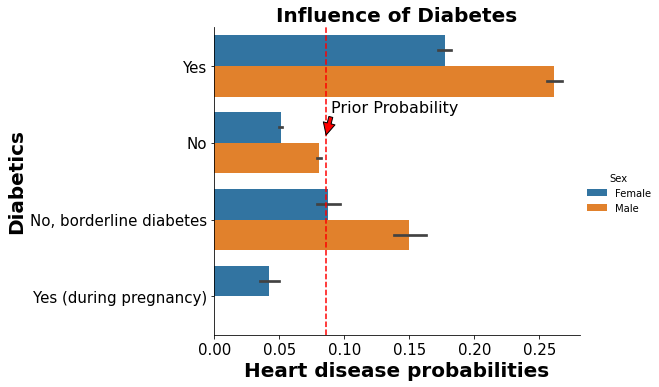

In [ ]:
# figure size in inches
sns.catplot(y="Diabetic", x="HeartDisease",hue = 'Sex', kind="bar", data=cat_df,
            height = 5, aspect = 1.5)
plt.axvline(0.086, 0,1, color = 'r', linestyle = '--')
plt.title('Influence of Diabetes', fontsize = 20, fontweight ='bold')
plt.xlabel('Heart disease probabilities', fontsize = 20, fontweight = 'bold')
plt.ylabel('Diabetics', fontsize = 20, fontweight = 'bold')
plt.tick_params(labelsize = 15, axis = 'both')
plt.annotate('Prior Probability', xy = (0.086, 0.9), 
             fontsize = 16, xytext = (0.09, 0.6), 
             arrowprops = dict(facecolor = 'red'),
             color = 'black')
plt.show()

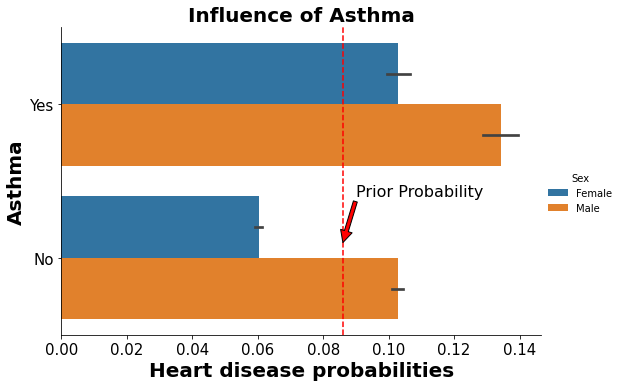

In [ ]:
sns.catplot(y="Asthma", x="HeartDisease",hue = 'Sex', kind="bar", data=cat_df,
            height = 5, aspect = 1.5)
plt.axvline(0.086, 0,1, color = 'r', linestyle = '--')
plt.title('Influence of Asthma', fontsize = 20, fontweight ='bold')
plt.xlabel('Heart disease probabilities', fontsize = 20, fontweight = 'bold')
plt.ylabel('Asthma', fontsize = 20, fontweight = 'bold')
plt.tick_params(labelsize = 15, axis = 'both')
plt.annotate('Prior Probability', xy = (0.086, 0.9), 
             fontsize = 16, xytext = (0.09, 0.6), 
             arrowprops = dict(facecolor = 'red'),
             color = 'black')
plt.show()

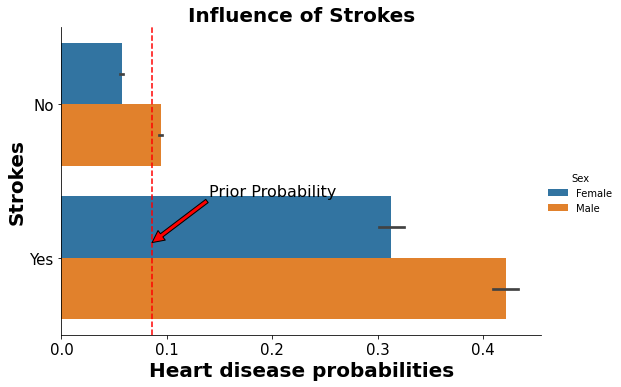

In [ ]:
sns.catplot(y="Stroke", x="HeartDisease",hue = 'Sex', kind="bar", data=cat_df,
            height = 5, aspect = 1.5)
plt.axvline(0.086, 0,1, color = 'r', linestyle = '--')
plt.title('Influence of Strokes', fontsize = 20, fontweight ='bold')
plt.xlabel('Heart disease probabilities', fontsize = 20, fontweight = 'bold')
plt.ylabel('Strokes', fontsize = 20, fontweight = 'bold')
plt.tick_params(labelsize = 15, axis = 'both')
plt.annotate('Prior Probability', xy = (0.086, 0.9), 
             fontsize = 16, xytext = (0.14, 0.6), 
             arrowprops = dict(facecolor = 'red'),
             color = 'black')
plt.show()

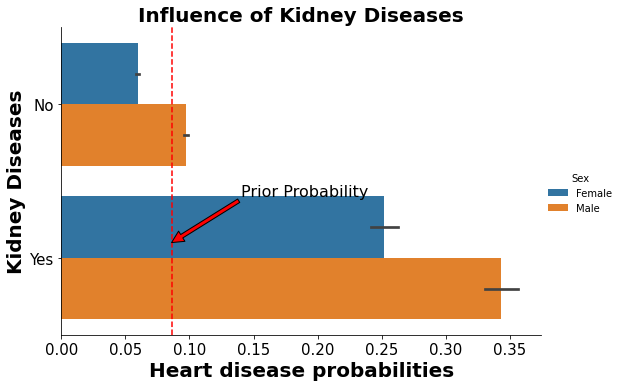

In [ ]:
sns.catplot(y="KidneyDisease", x="HeartDisease",hue = 'Sex', kind="bar", data=cat_df,
            height = 5, aspect = 1.5)
plt.axvline(0.086, 0,1, color = 'r', linestyle = '--')
plt.title('Influence of Kidney Diseases', fontsize = 20, fontweight ='bold')
plt.xlabel('Heart disease probabilities', fontsize = 20, fontweight = 'bold')
plt.ylabel('Kidney Diseases', fontsize = 20, fontweight = 'bold')
plt.tick_params(labelsize = 15, axis = 'both')
plt.annotate('Prior Probability', xy = (0.086, 0.9), 
             fontsize = 16, xytext = (0.14, 0.6), 
             arrowprops = dict(facecolor = 'red'),
             color = 'black')
plt.show()

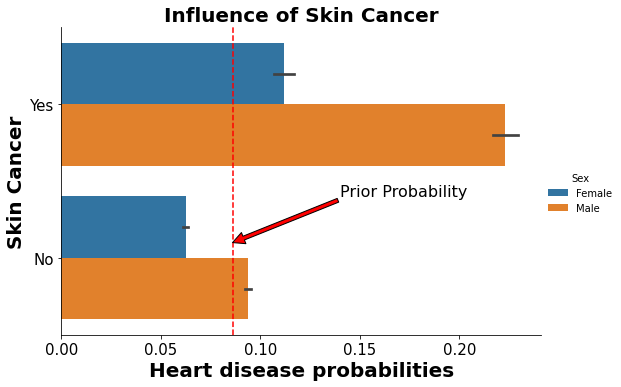

In [ ]:
sns.catplot(y="SkinCancer", x="HeartDisease",hue = 'Sex', kind="bar", data=cat_df,
            height = 5, aspect = 1.5)
plt.axvline(0.086, 0,1, color = 'r', linestyle = '--')
plt.title('Influence of Skin Cancer', fontsize = 20, fontweight ='bold')
plt.xlabel('Heart disease probabilities', fontsize = 20, fontweight = 'bold')
plt.ylabel('Skin Cancer', fontsize = 20, fontweight = 'bold')
plt.tick_params(labelsize = 15, axis = 'both')
plt.annotate('Prior Probability', xy = (0.086, 0.9), 
             fontsize = 16, xytext = (0.14, 0.6), 
             arrowprops = dict(facecolor = 'red'),
             color = 'black')
plt.show()

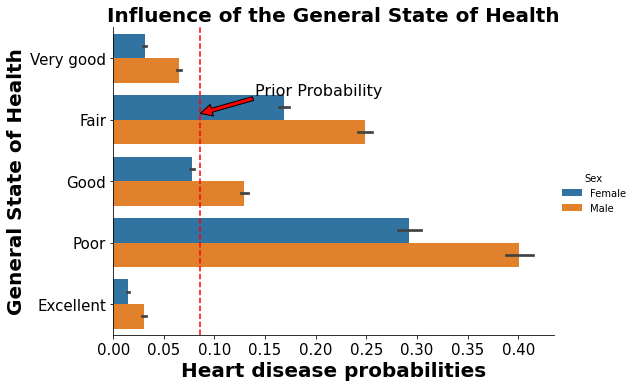

In [ ]:
sns.catplot(y="GenHealth", x="HeartDisease",hue = 'Sex', kind="bar", data=cat_df,
            height = 5, aspect = 1.5)
plt.axvline(0.086, 0,1, color = 'r', linestyle = '--')
plt.title('Influence of the General State of Health', fontsize = 20, fontweight ='bold')
plt.xlabel('Heart disease probabilities', fontsize = 20, fontweight = 'bold')
plt.ylabel('General State of Health', fontsize = 20, fontweight = 'bold')
plt.tick_params(labelsize = 15, axis = 'both')
plt.annotate('Prior Probability', xy = (0.086, 0.9), 
             fontsize = 16, xytext = (0.14, 0.6), 
             arrowprops = dict(facecolor = 'red'),
             color = 'black')
plt.show()

As we can see every health condition seems to have an effect on the presence of heart diseases. Among all, skin cancer, strokes and kidney diseases seems to have a strong correlation with heart problems.

The general state of health also seems to be a good indicator. People in the "Fair" and "Poor" categories have a much higher chance to develop the disease compared with people in the "Excellent" category.

**Does the distribution of heart diseases changes depending on the Race?**

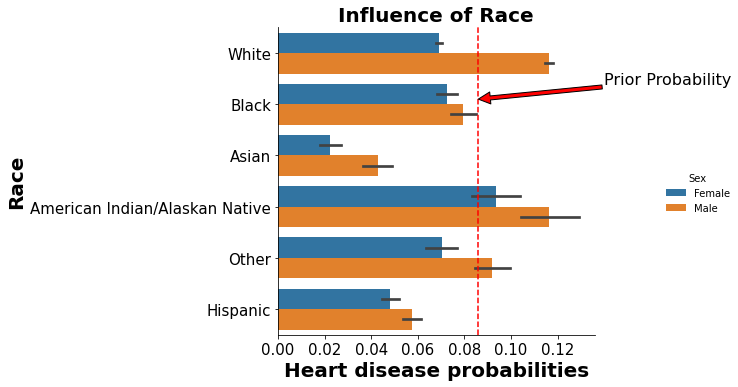

In [ ]:
sns.catplot(y="Race", x="HeartDisease",hue = 'Sex', kind="bar", data=cat_df,
            height = 5, aspect = 1.5)
plt.axvline(0.086, 0,1, color = 'r', linestyle = '--')
plt.title('Influence of Race', fontsize = 20, fontweight ='bold')
plt.xlabel('Heart disease probabilities', fontsize = 20, fontweight = 'bold')
plt.ylabel('Race', fontsize = 20, fontweight = 'bold')
plt.tick_params(labelsize = 15, axis = 'both')
plt.annotate('Prior Probability', xy = (0.086, 0.9), 
             fontsize = 16, xytext = (0.14, 0.6), 
             arrowprops = dict(facecolor = 'red'),
             color = 'black')
plt.show()

Thre is an important ethical issue to be adressed: the bias of the dataset concerning race. As we could see from the previous section, there a big bias towards the "White" category. That being said, from the graph above, there is not a big influence of this feature on the target. 

That is the reason why we will not be using this field as a Machine Learning feature in the model training procedure.

**Is the dificulty in climbing stairs a good indicator of heart diseases?**

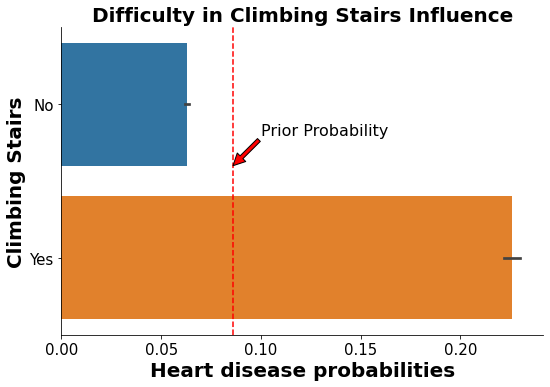

In [ ]:
sns.catplot(y="DiffWalking", x="HeartDisease",hue = None, kind="bar", data=cat_df,
            height = 5, aspect = 1.5)
plt.axvline(0.086, 0,1, color = 'r', linestyle = '--')
plt.title('Difficulty in Climbing Stairs Influence', fontsize = 20, fontweight ='bold')
plt.xlabel('Heart disease probabilities', fontsize = 20, fontweight = 'bold')
plt.ylabel('Climbing Stairs', fontsize = 20, fontweight = 'bold')
plt.tick_params(labelsize = 15, axis = 'both')
plt.annotate('Prior Probability', xy = (0.086, 0.4), 
             fontsize = 16, xytext = (0.1, 0.2), 
             arrowprops = dict(facecolor = 'red'),
             color = 'black')
plt.show()

People that have difficulty climbing stairs have nearly 4x more chance to develop heart conditions than those who don't. That field seems to have a good correlation with the target and could be used as a feature.

**Numerical correlation**

Using the numerical features, we can calculate the linear correlation.

Correlation values near to 1 indicates a strong relationship between the variables. In this part, we are looking for features that have a big correlation with heart diseases.

It is also important to point out that features that have a big correlation among themselves are not very good to be used together. It's better to use uncorrelated features.

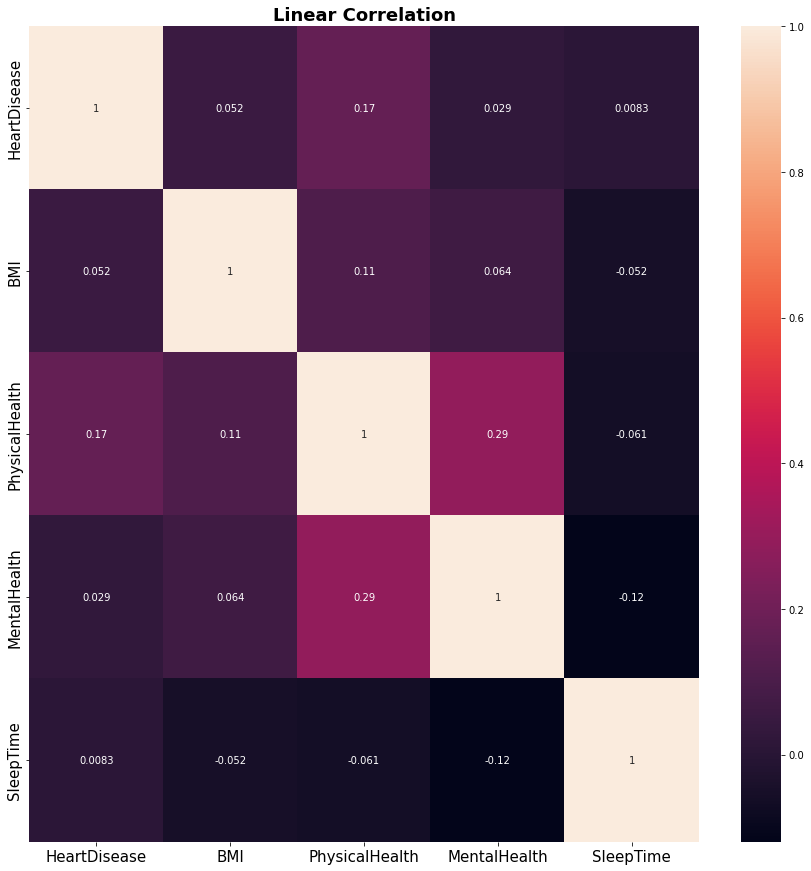

In [ ]:
correlation = cat_df[['HeartDisease'] + numerical].corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, annot = True)
plt.title('Linear Correlation', fontsize = 18, fontweight = 'bold')
plt.tick_params(labelsize = 15, axis = 'both')

plt.show()

From the graphic, we can see that there is no strong numerical correlation with the target. That being said, we could also visualize how the presence of heart diseases affects the distribution of these numerical features.

Since there is no strong correlation, we don't expect to see a significant difference in the distributions.

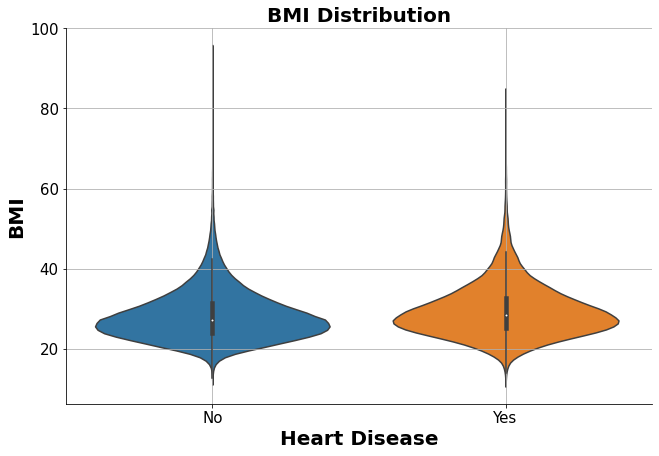

In [ ]:

sns.catplot(x="HeartDisease", y="BMI",hue = None, kind="violin", data=df,
            height = 6, aspect = 1.5)
plt.title('BMI Distribution', fontsize = 20, fontweight ='bold')
plt.xlabel('Heart Disease', fontsize = 20, fontweight = 'bold')
plt.ylabel('BMI', fontsize = 20, fontweight = 'bold')
plt.tick_params(labelsize = 15, axis = 'both')
plt.grid(True)
plt.show()

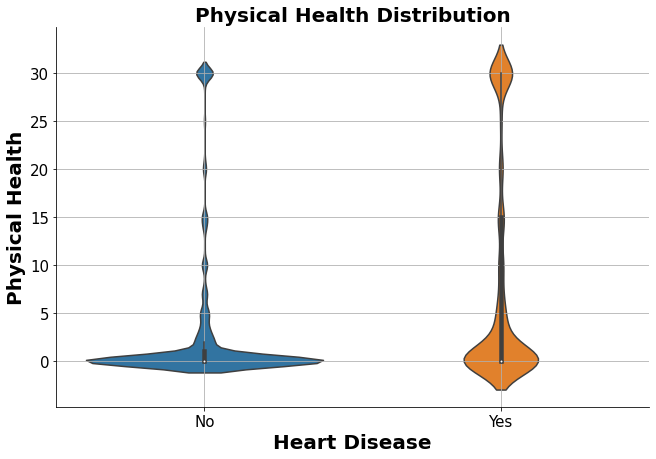

In [ ]:
sns.catplot(x="HeartDisease", y="PhysicalHealth",hue = None, kind="violin", data=df,
            height = 6, aspect = 1.5)
# plt.axvline(0.086, 0,1, color = 'r', linestyle = '--')
plt.title('Physical Health Distribution', fontsize = 20, fontweight ='bold')
plt.ylabel('Physical Health', fontsize = 20, fontweight = 'bold')
plt.xlabel('Heart Disease', fontsize = 20, fontweight = 'bold')
plt.tick_params(labelsize = 15, axis = 'both')
plt.grid(True)
plt.show()

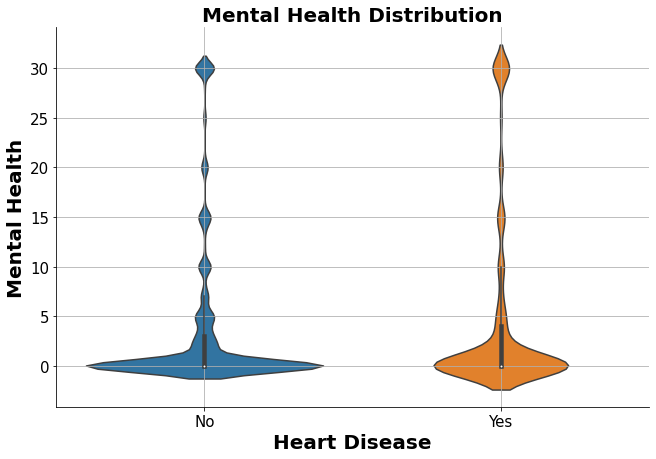

In [ ]:
sns.catplot(x="HeartDisease", y="MentalHealth",hue = None, kind="violin", data=df,
            height = 6, aspect = 1.5)
plt.title('Mental Health Distribution', fontsize = 20, fontweight ='bold')
plt.ylabel('Mental Health', fontsize = 20, fontweight = 'bold')
plt.xlabel('Heart Disease', fontsize = 20, fontweight = 'bold')
plt.tick_params(labelsize = 15, axis = 'both')
plt.grid(True)
plt.show()

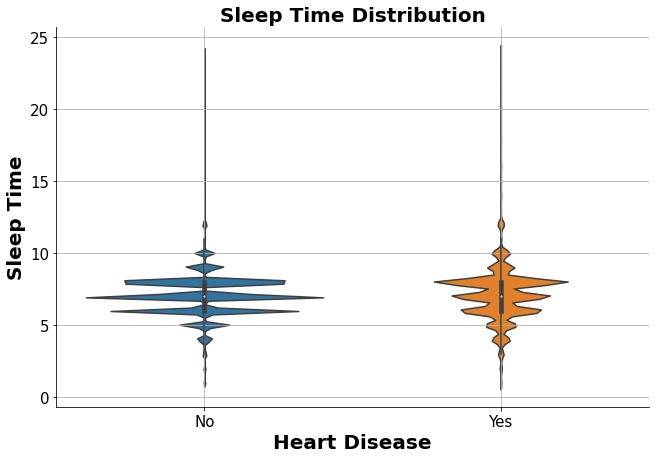

In [ ]:
sns.catplot(x="HeartDisease", y="SleepTime",hue = None, kind="violin", data=df,
            height = 6, aspect = 1.5)
plt.title('Sleep Time Distribution', fontsize = 20, fontweight ='bold')
plt.ylabel('Sleep Time', fontsize = 20, fontweight = 'bold')
plt.xlabel('Heart Disease', fontsize = 20, fontweight = 'bold')
plt.tick_params(labelsize = 15, axis = 'both')
plt.grid(True)
plt.show()

### Part 2: Data Processing and Feature Selection <a class="anchor" id="parte_02"></a>

In this section, we use two different approaches to create dataframes with different subsets of features.

The first approach is completely qualitative and intuitive. By analyzing the previous section, we hand-picked different combinations of categorical features that seem to have a big impact on the label. It is important to point out that the more uncorrelated these features are, the better.

The second approach is by using the K-Best-Features module from Sklearn. This is an automatic procedure that yields the subsets of K-Features that most correlate with the target. 

**First Approach**

In [ ]:
# Different set of qualitative features
qualitative_features1 = ['AgeCategory', 'Sex', 'Smoking', 'AlcoholDrinking', 'DiffWalking']
qualitative_features2 = ['AgeCategory', 'SkinCancer', 'GenHealth', 'DiffWalking', 'AlcoholDrinking']
qualitative_features3 = ['AgeCategory', 'KidneyDisease', 'Stroke', 'DiffWalking', 'Diabetic']

target = ['HeartDisease']

# Defining LabelEncoder and StandardScaler objects
dataframe     = pd.read_csv('/content/heart_2020_cleaned.csv')
label_encoder = preprocessing.LabelEncoder()
scaler        = preprocessing.StandardScaler()

# Processing dataframes (choosing features and applying encoder + scaler)
qualitative_df1 = dataframe[qualitative_features1 + target].apply(label_encoder.fit_transform)
qualitative_df1['AgeCategory'] = scaler.fit_transform(qualitative_df1['AgeCategory'].values.reshape(-1,1))

qualitative_df2 = dataframe[qualitative_features2 + target].apply(label_encoder.fit_transform)
qualitative_df2['AgeCategory'] = scaler.fit_transform(qualitative_df2['AgeCategory'].values.reshape(-1,1))
qualitative_df2['GenHealth']   = scaler.fit_transform(qualitative_df2['GenHealth'].values.reshape(-1,1))


qualitative_df3 = dataframe[qualitative_features3 + target].apply(label_encoder.fit_transform)
qualitative_df3['AgeCategory'] = scaler.fit_transform(qualitative_df3['AgeCategory'].values.reshape(-1,1))
qualitative_df3['Diabetic']    = scaler.fit_transform(qualitative_df3['Diabetic'].values.reshape(-1,1))


In [ ]:
!mkdir training_datasets

mkdir: cannot create directory ‘training_datasets’: File exists


In [ ]:
def split_and_save_dataframe(dataframe, train_perc, name):
  """
  Method for splitting and saving a specific dataframe in the google drive
  """
  X_train, X_valid, y_train, y_valid = _split_dataframe(dataframe, train_perc)
  _save_dataframe((X_train, X_valid, y_train, y_valid), name)
  

def _split_dataframe(dataframe, train_perc):
  """
  Splits the dataframe into train and validation
  """
  X = dataframe.drop('HeartDisease', axis = 1)
  y = dataframe['HeartDisease']

  X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = (1 - train_perc))

  return X_train, X_valid, y_train, y_valid

def _save_dataframe(splited_df, name):
  """
  Saves the train and validation sets in the folder defined in local variable folder_path
  """
  folder_path = '/content/training_datasets'
  splited_df[0].to_csv(folder_path + '/' + 'X_train_{}.csv'.format(name), index = False)
  splited_df[1].to_csv(folder_path + '/' + 'X_valid_{}.csv'.format(name), index = False)
  splited_df[2].to_csv(folder_path + '/' + 'y_train_{}.csv'.format(name), index = False)
  splited_df[3].to_csv(folder_path + '/' + 'y_valid_{}.csv'.format(name), index = False)


# Saving qualitative dataframes
split_and_save_dataframe(qualitative_df1, 0.8, 'qualitative_df1')
split_and_save_dataframe(qualitative_df2, 0.8, 'qualitative_df2')
split_and_save_dataframe(qualitative_df3, 0.8, 'qualitative_df3')

**Second Approach**

In [ ]:
# Processing the whole dataframe
dataframe     = pd.read_csv('/content/heart_2020_cleaned.csv')

# Label encode the categorical variables and scaling categorical ones
label_encoder = preprocessing.LabelEncoder()
scaler        = preprocessing.StandardScaler()

dataframe[categorical] = dataframe[categorical].apply(label_encoder.fit_transform)
dataframe[numerical]   = scaler.fit_transform(dataframe[numerical])
dataframe[categorical] = dataframe[categorical] / dataframe[categorical].max().values
dataframe.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,-1.844750,1.0,0.0,0.0,-0.046751,3.281069,0.0,0.0,0.583333,1.0,0.666667,1.0,1.00,-1.460354,1.0,0.0,1.0
1,0.0,-1.256338,0.0,0.0,1.0,-0.424070,-0.490039,0.0,0.0,1.000000,1.0,0.000000,1.0,1.00,-0.067601,0.0,0.0,0.0
2,0.0,-0.274603,1.0,0.0,0.0,2.091388,3.281069,0.0,1.0,0.750000,1.0,0.666667,1.0,0.25,0.628776,1.0,0.0,0.0
3,0.0,-0.647473,0.0,0.0,0.0,-0.424070,-0.490039,0.0,0.0,0.916667,1.0,0.000000,0.0,0.50,-0.763977,0.0,0.0,1.0
4,0.0,-0.726138,0.0,0.0,0.0,3.097572,-0.490039,1.0,0.0,0.333333,1.0,0.000000,1.0,1.00,0.628776,0.0,0.0,0.0


We are going to propose 4 different values of K, generating 4 different datasets with features chosen by a numerical approach

In [ ]:
for K in [3, 5, 8, 12]:
  print('Processing and saving dataframe for K = {}...'.format(K))
  X,y = dataframe.drop('HeartDisease', axis = 1), dataframe['HeartDisease']
  feature_selector        = SelectKBest(k = K).fit(X,y)
  selected_features_index = feature_selector.get_support()
  selected_dataframe      = X.iloc[:, selected_features_index]
  selected_dataframe      = pd.concat([selected_dataframe, y], axis = 1)
  split_and_save_dataframe(selected_dataframe, 0.8, 'quantitative_K_{}'.format(K))



Processing and saving dataframe for K = 3...
Processing and saving dataframe for K = 5...
Processing and saving dataframe for K = 8...
Processing and saving dataframe for K = 12...


Reading saved datasets

In [ ]:
# Reading files from datasets folders
training_folder = "/content/training_datasets/"
files           = os.listdir(training_folder)

# Getting unique ids and reading dataframes into pandas
ids            = list(set([item[8:] for item in files])) # e.g. qualitative_df1.csv -> used to match respective x and y
ids.sort()
train_datasets = [(pd.read_csv(training_folder + 'X_train_' + id), pd.read_csv(training_folder + 'y_train_' + id)) for id in ids]
valid_datasets = [(pd.read_csv(training_folder + 'X_valid_' + id), pd.read_csv(training_folder + 'y_valid_' + id)) for id in ids]

### Part 3: Metrics Definition and Baseline Model <a class="anchor" id="parte_03"></a>

#### Metrics Definition

One very important step in developing a Machine Learning project is defining the evaluation metrics that will be used. Using a wrong metric could completely misguide the training process, leading to poor models.

One of the most commom metrics for classification tasks is the accuracy, which basicall measures the number of correct predictions over the total number of samples. In the case of heavily imbalanced datasets, accuracy is not a good metric, since it can lead to sub-optimal classification models and might produce misleading conclusions because it in insensitive to skewed domains.

The first kind of metric that we will use is the **Confusion Matrix**. It provides more insight into the model performance, as well as shows what kind of classes are being mislabeled. In the Figure below, we have a representation of this matrix.

![](https://drive.google.com/uc?export=view&id=1hU4MKIprPcMRbAQg50er8ABMRSDCc4MB)

Next, we will use the module *classification_report* from Sklearn to implement sensitive metrics, such as precision, recall and f1-score. Sensitivity refers to the true positive rate and summarizes how well the positive class was predicted. This is particularly important since there are few positive examples in our dataset.

Finally, the last kind of metric is called Ranking Metric, and measures how effectively the model is separating the classes. The most commonly used ranking metric is the **ROC Curve or ROC Analysis**.

A ROC curve is a diagnostic plot for summarizing the behavior of a model by calculating the false positive rate and true positive rate for a set of predictions by the model under different thresholds.

The area under a ROC curve can evaluate the performance of the model. A no skill classifier should give a ROC_AUC of 0.5, while a perfect classifier shoul give a result of 1.0.



![](https://drive.google.com/uc?export=view&id=1wJJcac7LwNVfc1k4EBaq_7ix04raVHFZ)



**Reference:** https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/

#### Baseline Model

We will define two baseline no-skill classifiers. These are Naive Classifiers and take into consideration only the Prior Probability of the Heart Diseases distribution.

The first naive classifier predicts all zeros, since more than 90% of samples have this label. This should produce a high accuracy, but fail in the better defined metrics.

The second naive classifier predicts zeros with a probability of 91.4% and predicts ones with a probability of 8.6%. This is exactly the Prior Distribution. We expect this second approach to have a lower accuracy, but perform a little better in the remainding metrics.

In [ ]:
# Defining naive classifier 1
naive_predictions1  = np.zeros(len(valid_datasets[0][1])) # predictions
naive_probabilites1 = [0 for _ in range(len(valid_datasets[0][1]))] # probabilities

# Defining naive classifier 2
negative_probability = 0.914
positive_probability = (1 - negative_probability)
dataset_size = len(valid_datasets[0][1])

zeros_array = np.zeros(int(dataset_size * negative_probability))
ones_array  = np.ones((int(dataset_size * positive_probability) + 1))

naive_predictions2 = np.concatenate([zeros_array, ones_array], axis = 0)
np.random.shuffle(naive_predictions2)
naive_probabilites2 = naive_predictions2.copy()


**Confusion Matrix**

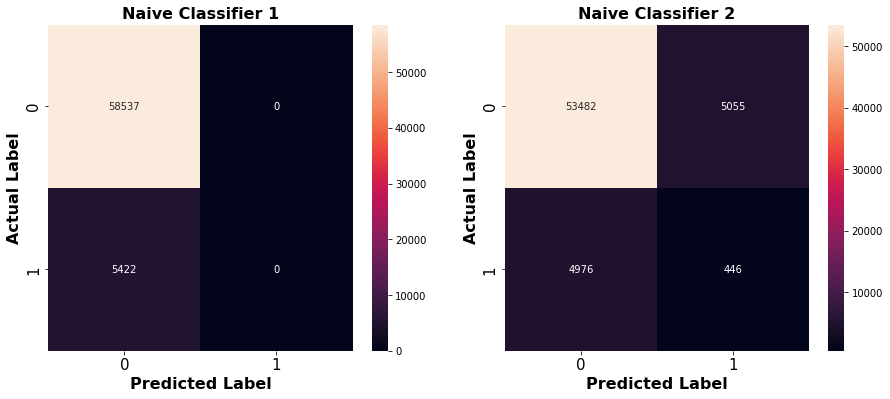

In [ ]:
naive_conf_matrix1 = confusion_matrix(valid_datasets[0][1], naive_predictions1)
naive_conf_matrix2 = confusion_matrix(valid_datasets[0][1], naive_predictions2)

fig, ax = plt.subplots(figsize = (15,6), nrows = 1, ncols = 2)
sns.heatmap(naive_conf_matrix1, ax = ax[0], annot = True, fmt = "d")
ax[0].set_title('Naive Classifier 1', fontsize = 16, fontweight = 'bold')
ax[0].set_xlabel('Predicted Label', fontsize = 16, fontweight = 'bold')
ax[0].set_ylabel('Actual Label', fontsize = 16, fontweight = 'bold')
ax[0].tick_params(axis = 'both', labelsize = 15)

sns.heatmap(naive_conf_matrix2, ax = ax[1], annot = True, fmt = "d")
ax[1].set_title('Naive Classifier 2', fontsize = 16, fontweight = 'bold')
ax[1].set_xlabel('Predicted Label', fontsize = 16, fontweight = 'bold')
ax[1].set_ylabel('Actual Label', fontsize = 16, fontweight = 'bold')
ax[1].tick_params(axis = 'both', labelsize = 15)

**Classification Report**

In [ ]:
print('Naive Classifier 1')
print(classification_report(naive_predictions1, valid_datasets[0][1]))
print('#' * 50)
print('Naive Classifier 2')
print(classification_report(naive_predictions2, valid_datasets[0][1]))

Naive Classifier 1
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96     63959
         1.0       0.00      0.00      0.00         0

    accuracy                           0.92     63959
   macro avg       0.50      0.46      0.48     63959
weighted avg       1.00      0.92      0.96     63959

##################################################
Naive Classifier 2
              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91     58458
         1.0       0.08      0.08      0.08      5501

    accuracy                           0.84     63959
   macro avg       0.50      0.50      0.50     63959
weighted avg       0.84      0.84      0.84     63959



**ROC - AUC**

In [ ]:
# Building the ROC curve
nv1_fpr, nv1_tpr, _ = roc_curve(valid_datasets[0][1], naive_probabilites1)
nv2_fpr, nv2_tpr, _ = roc_curve(valid_datasets[0][1], naive_probabilites2)

# Calculating Area Under Curve
nv1_auc = roc_auc_score(valid_datasets[0][1], naive_probabilites1)
nv2_auc = roc_auc_score(valid_datasets[0][1], naive_probabilites2)

print('Naive classifier 1: ROC AUC = %.3f' % (nv1_auc))
print('Naive classifier 2: ROC AUC = %.3f' % (nv2_auc))

Naive classifier 1: ROC AUC = 0.500
Naive classifier 2: ROC AUC = 0.498


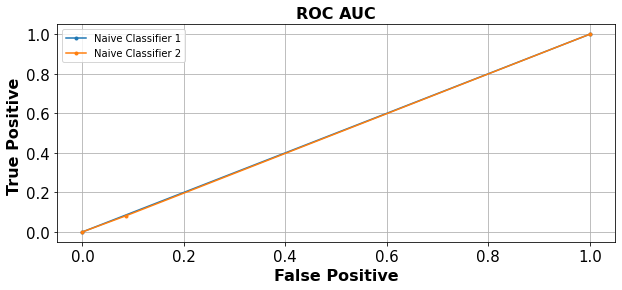

In [ ]:
fig, ax = plt.subplots(figsize = (10,4))

ax.plot(nv1_fpr, nv1_tpr, marker='.', label='Naive Classifier 1')
ax.plot(nv2_fpr, nv2_tpr, marker='.', label='Naive Classifier 2')

ax.set_title('ROC AUC', fontsize = 16, fontweight = 'bold')
ax.set_xlabel('False Positive', fontsize = 16, fontweight = 'bold')
ax.set_ylabel('True Positive ', fontsize = 16, fontweight = 'bold')
ax.tick_params(axis = 'both', labelsize = 15)
ax.grid(True)
ax.legend()
plt.show()

**Important Remaks**


*   As we could expect, both naive classifiers present a high accuracy around 90%. That shows this metric is not suited for imbalanced classification problems
*   The precision and recall of the positive class in both approaches is very low
*   The ROC AUC curve behaves as expected, presenting an AUC value of 0.5 for the Naive Classifier 1 and 0.498  for the Naive Classifier 2.



### Part 4: Model Training and Parameter Search <a class="anchor" id="parte_04"></a>

The goal of this section is to experiment with the different datasets built, as well with different models with different parameters.

In the first part, we are going to define a set of the following models:


*   **Logistic Regression**
*   **Logistic Regression With Class Weighting**
*   **Standard Random Forest**
*   **Random Forest With Class Weighting**
*   **Random Forest With Bootstrap Class Weighting**
*   **Random Forest With Random Undersampling**
*   **Naive Bayes**

For each of these, with almost *out-of-box* parameters, we will evaluate on the 7 different datasets, choosing the one that yields the best overall ROC AUC score.

In the second part, we will vary the hiperparameters for the best models, training and evaluating on the dataset chosen from the first part.





**First Part**

In [ ]:
# Defining a set of models
models = [LogisticRegression(),LogisticRegression(class_weight = 'balanced'), RandomForestClassifier(n_estimators=10), 
          RandomForestClassifier(n_estimators=10, class_weight='balanced'), 
          RandomForestClassifier(n_estimators=10, class_weight = 'balanced_subsample'), 
          BalancedRandomForestClassifier(n_estimators=10), GaussianNB()]

# datasets_results = {} # dict to save results from each different dataframe
models_results = {}

# starting dict to save results
for model in models:
  models_results[str(model)] = {}
  models_results[str(model)]['acc'] = []
  models_results[str(model)]['pre'] = []
  models_results[str(model)]['rec'] = []
  models_results[str(model)]['auc'] = []


for ix, train_dataset in enumerate(train_datasets):

  print('#'*100, '\n')
  print('Using {} dataset'.format(ids[ix]))
  for model in models:
    # Fitting model and getting predictions
    model.fit(train_dataset[0],train_dataset[1])
    y_pred = model.predict(valid_datasets[ix][0])

    # Printing partial results
    print(f'Model: {str(model)}')
    print(f'Accuracy Score: {accuracy_score(valid_datasets[ix][1],y_pred)}')
    print(f'Precission Score: {precision_score(valid_datasets[ix][1],y_pred)}')
    print(f'Recall Score: {recall_score(valid_datasets[ix][1],y_pred)}')
    print(f'AUC Score: {roc_auc_score(valid_datasets[ix][1],y_pred)}')
    print('-'*100, '\n')
    
    # saving partial results
    models_results[str(model)]['acc'].append(accuracy_score(valid_datasets[ix][1],y_pred))
    models_results[str(model)]['pre'].append(precision_score(valid_datasets[ix][1],y_pred))
    models_results[str(model)]['rec'].append(recall_score(valid_datasets[ix][1],y_pred))
    models_results[str(model)]['auc'].append(roc_auc_score(valid_datasets[ix][1],y_pred))

#################################################################################################### 

Using qualitative_df1.csv dataset
Model: LogisticRegression()
Accuracy Score: 0.9149142419362404
Precission Score: 0.46710526315789475
Recall Score: 0.02618959793434157
AUC Score: 0.5117110587686639
---------------------------------------------------------------------------------------------------- 

Model: LogisticRegression(class_weight='balanced')
Accuracy Score: 0.6987132381682015
Precission Score: 0.18714982830290983
Recall Score: 0.7639247510143858
AUC Score: 0.728298880623615
---------------------------------------------------------------------------------------------------- 

Model: RandomForestClassifier(n_estimators=10)
Accuracy Score: 0.9152269422598852
Precission Score: 0.0
Recall Score: 0.0
AUC Score: 0.5
---------------------------------------------------------------------------------------------------- 

Model: RandomForestClassifier(class_weight='balanced', n_estimator

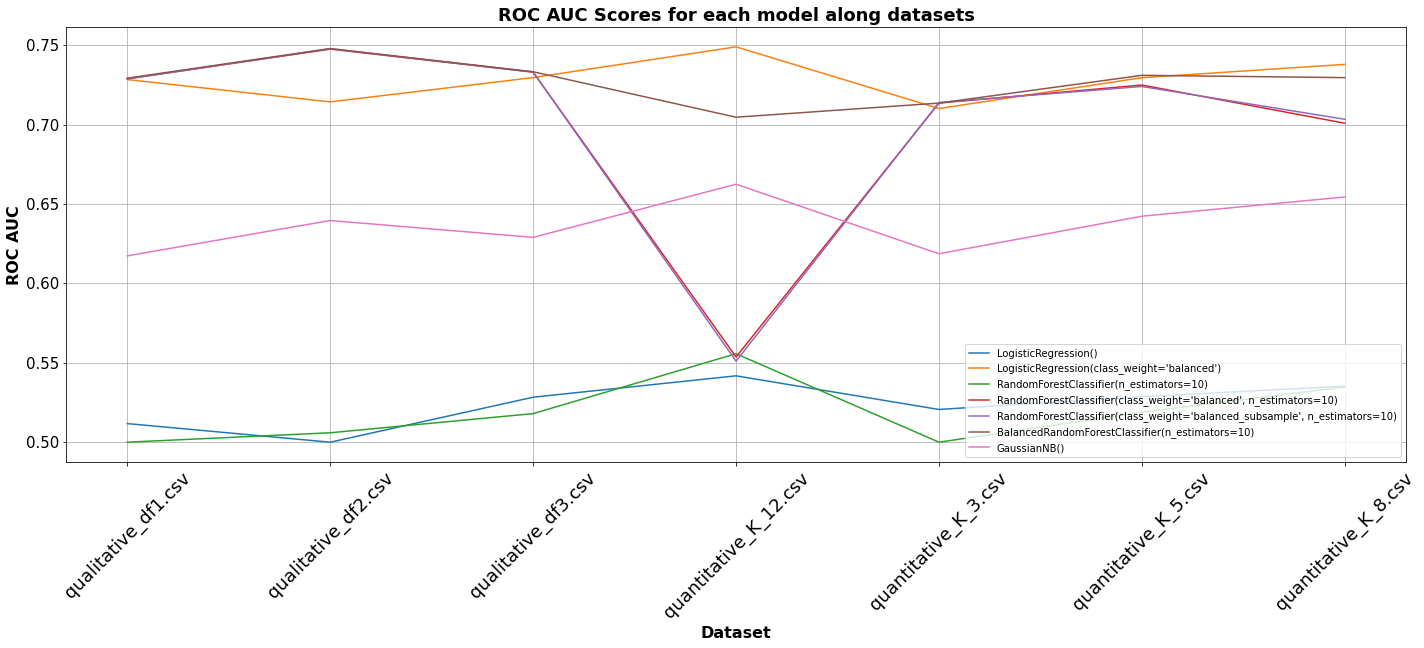

In [ ]:
fig, ax = plt.subplots(figsize = (24,8))
for model in models_results:
  ax.plot(models_results[model]['auc'], label = model)
ax.legend(loc = 'lower right')
ax.grid(True)
ax.set_title('ROC AUC Scores for each model along datasets', fontsize = 18, fontweight = 'bold')
ax.set_ylabel('ROC AUC', fontsize = 16, fontweight = 'bold')
ax.set_xlabel('Dataset', fontsize = 16, fontweight = 'bold')

ax.tick_params(axis = 'both', labelsize = 15)

x = [i for i in range(7)]
# Set number of ticks for x-axis
ax.set_xticks(x)
# Set ticks labels for x-axis
ax.set_xticklabels(ids, rotation=45, fontsize=18)

plt.show()

**Important Remarks**



*   The models that deal with class imbalance showed a much more consistent result than those that don't
*   The Logistic Regressor and Random Forest with class weight seem to have the better results among all of the models
*   The Qualitative Dataframe 2 showed the best results for the Random Forest models, therefore will be the one used for the next experiments



**Second Part**

First we are going to define a set of parameters for the Random Forest Classifier: **class_weight, n_estimator, criterion and max_features**

In [ ]:
# Grid Search CV on the 2 best models

RF_clf = RandomForestClassifier()

# Defining search parameters and scoring metrics
params  = {'class_weight': ['balanced', 'balanced_subsample'],'n_estimators': [10, 20, 50], 'criterion': ['gini', 'entropy'], 'max_features': ['sqrt', 'log2']}
scoring = {'Acc': 'accuracy', 'Precision': 'precision', 'Recall': 'recall', 'AUC': 'roc_auc'}

# Grid Search on Cross-Validation
rf_clf = GridSearchCV(RF_clf, param_grid = params, scoring = scoring, refit = 'AUC')
rf_clf.fit(train_datasets[1][0], train_datasets[1][1])


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 20, 50]},
             refit='AUC',
             scoring={'AUC': 'roc_auc', 'Acc': 'accuracy',
                      'Precision': 'precision', 'Recall': 'recall'})

In [ ]:
print('Best parameters found: ', rf_clf.best_params_)

Best parameters found:  {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 50}


**Evaluating the results in the defined metrics**

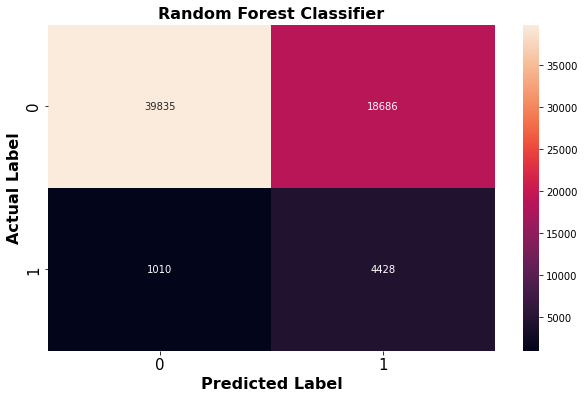

In [ ]:
# Confusion matrix
rf_y_pred = rf_clf.best_estimator_.predict(valid_datasets[1][0])
rf_conf_matrix = confusion_matrix(valid_datasets[1][1], rf_y_pred)

fig, ax = plt.subplots(figsize = (10,6), nrows = 1, ncols = 1)
sns.heatmap(rf_conf_matrix, ax = ax, annot = True, fmt = "d")
ax.set_title('Random Forest Classifier', fontsize = 16, fontweight = 'bold')
ax.set_xlabel('Predicted Label', fontsize = 16, fontweight = 'bold')
ax.set_ylabel('Actual Label', fontsize = 16, fontweight = 'bold')
ax.tick_params(axis = 'both', labelsize = 15)

In [ ]:
# classification report
print('Random Forest Classifier')
print(classification_report(rf_y_pred, valid_datasets[1][1]))

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.68      0.98      0.80     40845
           1       0.81      0.19      0.31     23114

    accuracy                           0.69     63959
   macro avg       0.75      0.58      0.56     63959
weighted avg       0.73      0.69      0.62     63959



Random Forest: ROC AUC = 0.818


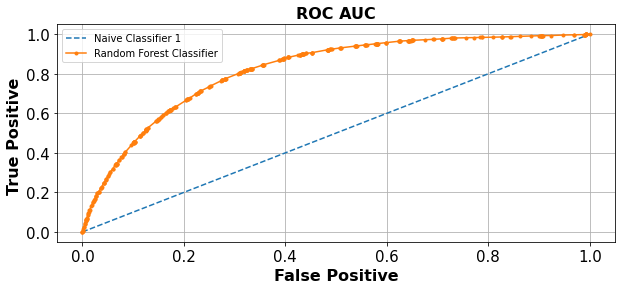

In [ ]:
# ROC AUC

# Building the ROC curve
rf_probs = rf_clf.best_estimator_.predict_proba(valid_datasets[1][0])[:,1]
rf_fpr, rf_tpr, _ = roc_curve(valid_datasets[1][1], rf_probs)

# Calculating Area Under Curve
rf_auc = roc_auc_score(valid_datasets[1][1], rf_probs)

print('Random Forest: ROC AUC = %.3f' % (rf_auc))

fig, ax = plt.subplots(figsize = (10,4))

ax.plot(nv1_fpr, nv1_tpr, linestyle='--', label='Naive Classifier 1')
ax.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest Classifier')

ax.set_title('ROC AUC', fontsize = 16, fontweight = 'bold')
ax.set_xlabel('False Positive', fontsize = 16, fontweight = 'bold')
ax.set_ylabel('True Positive ', fontsize = 16, fontweight = 'bold')
ax.tick_params(axis = 'both', labelsize = 15)
ax.grid(True)
ax.legend()
plt.show()

In [ ]:
# Grid Search CV on the 3 best models

LR_clf = LogisticRegression()

params = {'class_weight': [None, 'balanced'], 'solver': ['newton-cg', 'lbfgs', 'saga']}
scoring = {'Acc': 'accuracy', 'Precision': 'precision', 'Recall': 'recall', 'AUC': 'roc_auc'}

lr_clf = GridSearchCV(LR_clf, param_grid = params, scoring = scoring, refit = 'AUC')
lr_clf.fit(train_datasets[1][0], train_datasets[1][1])


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'class_weight': [None, 'balanced'],
                         'solver': ['newton-cg', 'lbfgs', 'saga']},
             refit='AUC',
             scoring={'AUC': 'roc_auc', 'Acc': 'accuracy',
                      'Precision': 'precision', 'Recall': 'recall'})

In [ ]:
print('Best parameters found: ', lr_clf.best_params_)

Best parameters found:  {'class_weight': 'balanced', 'solver': 'lbfgs'}


**Evaluating the results in the defined metrics**

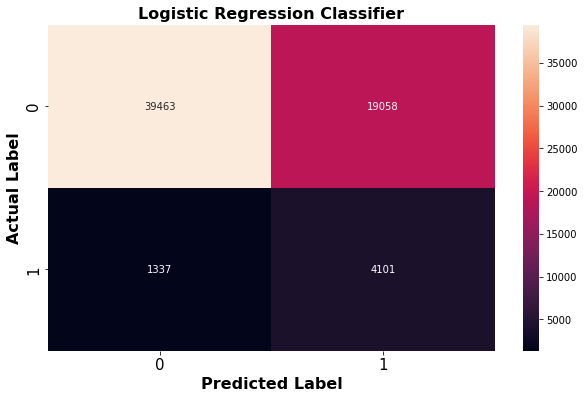

In [ ]:
# Confusion matrix
lr_y_pred = lr_clf.best_estimator_.predict(valid_datasets[1][0])
lr_conf_matrix = confusion_matrix(valid_datasets[1][1], lr_y_pred)

fig, ax = plt.subplots(figsize = (10,6), nrows = 1, ncols = 1)
sns.heatmap(lr_conf_matrix, ax = ax, annot = True, fmt = "d")
ax.set_title('Logistic Regression Classifier', fontsize = 16, fontweight = 'bold')
ax.set_xlabel('Predicted Label', fontsize = 16, fontweight = 'bold')
ax.set_ylabel('Actual Label', fontsize = 16, fontweight = 'bold')
ax.tick_params(axis = 'both', labelsize = 15)

In [ ]:
# classification report
print('Logistic Regression Classifier')
print(classification_report(lr_y_pred, valid_datasets[1][1]))

Logistic Regression Classifier
              precision    recall  f1-score   support

           0       0.67      0.97      0.79     40800
           1       0.75      0.18      0.29     23159

    accuracy                           0.68     63959
   macro avg       0.71      0.57      0.54     63959
weighted avg       0.70      0.68      0.61     63959



Logistic Regression: ROC AUC = 0.779


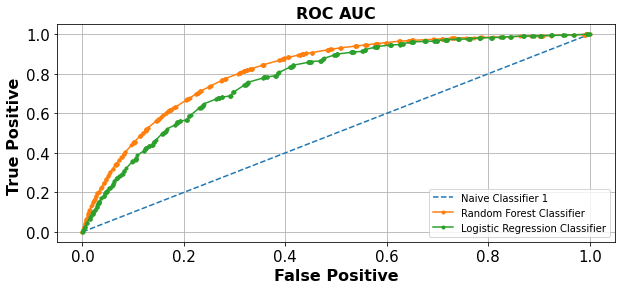

In [ ]:
# ROC AUC

# Building the ROC curve
lr_probs = lr_clf.best_estimator_.predict_proba(valid_datasets[1][0])[:,1]
lr_fpr, lr_tpr, _ = roc_curve(valid_datasets[1][1], lr_probs)

# Calculating Area Under Curve
lr_auc = roc_auc_score(valid_datasets[1][1], lr_probs)

print('Logistic Regression: ROC AUC = %.3f' % (lr_auc))

fig, ax = plt.subplots(figsize = (10,4))

ax.plot(nv1_fpr, nv1_tpr, linestyle='--', label='Naive Classifier 1')
ax.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest Classifier')
ax.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression Classifier')

ax.set_title('ROC AUC', fontsize = 16, fontweight = 'bold')
ax.set_xlabel('False Positive', fontsize = 16, fontweight = 'bold')
ax.set_ylabel('True Positive ', fontsize = 16, fontweight = 'bold')
ax.tick_params(axis = 'both', labelsize = 15)
ax.grid(True)
ax.legend()
plt.show()

### Part 5: Experimenting with Neural Networks <a class="anchor" id="parte_05"></a>

The goal of this section is to create a model with neural network, using the dataset Qualitative Dataframe 2, 

Because the dataset is imbalanced, we are going to set some weights for the classes and apply to the model.

In [ ]:
X_train = train_datasets[1][0]
y_train = train_datasets[1][1]
X_valid = valid_datasets[1][0]
y_valid = valid_datasets[1][1]

In [ ]:
no, yes = np.bincount(dataframe['HeartDisease'])
total = no + yes
print('Amount of samples of dataset:\nTotal: {}\nYes: {} ({:.2f}% of total)\n'.format(
    total, yes, 100 * yes / total))

Amount of samples of dataset:
Total: 319795
Yes: 27373 (8.56% of total)



As the results above show, we have only 8.56% of the positive samples from the class "Yes", we are going to apply weights to the classes, and doing so, the model will "pay more attention" to the samples from the class "Yes".

In [ ]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_NO = (1 / no) * (total / 2.0)
weight_for_YES = (1 / yes) * (total / 2.0)

class_weight = {0: weight_for_NO, 1: weight_for_YES}

print('Weight for class 0 - NO: {:.2f}'.format(weight_for_NO))
print('Weight for class 1 - YES: {:.2f}'.format(weight_for_YES))

Weight for class 0 - NO: 0.55
Weight for class 1 - YES: 5.84


In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(X_train.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-4),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

We build a simple neural network model, for the hidden layers, we use a Dense layer, using relu as activation function, one Dropout layer and a for the output layer, we use a Dense layer with activation function 'sgimoid'.
For a loss function, we chose "Binary Crossentropy".
For a optimizer function, we chose "Adam".

In [ ]:
modelNN = make_model()
modelNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                96        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
EPOCHS = 200
BATCH_SIZE = 2048

callbacks = [tf.keras.callbacks.ModelCheckpoint('model1.h5', monitor='val_loss', save_best_only=True),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                              verbose=1,
                                              patience=10,
                                              mode='min',
                                              restore_best_weights=True)]

model_history = modelNN.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=callbacks,
    validation_data=(X_valid, y_valid),
    # The class weights go here
    class_weight=class_weight)

Epoch 1/200
125/125 [==============================] - 4s 15ms/step - loss: 0.7312 - tp: 6248.0000 - fp: 62456.0000 - tn: 171445.0000 - fn: 15687.0000 - accuracy: 0.6946 - precision: 0.0909 - recall: 0.2848 - auc: 0.5308 - prc: 0.0883 - val_loss: 0.5716 - val_tp: 216.0000 - val_fp: 10178.0000 - val_tn: 48343.0000 - val_fn: 5222.0000 - val_accuracy: 0.7592 - val_precision: 0.0208 - val_recall: 0.0397 - val_auc: 0.5582 - val_prc: 0.0858
Epoch 2/200
125/125 [==============================] - 1s 4ms/step - loss: 0.7074 - tp: 7673.0000 - fp: 65502.0000 - tn: 168399.0000 - fn: 14262.0000 - accuracy: 0.6882 - precision: 0.1049 - recall: 0.3498 - auc: 0.5658 - prc: 0.0993 - val_loss: 0.5701 - val_tp: 952.0000 - val_fp: 9993.0000 - val_tn: 48528.0000 - val_fn: 4486.0000 - val_accuracy: 0.7736 - val_precision: 0.0870 - val_recall: 0.1751 - val_auc: 0.6345 - val_prc: 0.1244
Epoch 3/200
125/125 [==============================] - 1s 5ms/step - loss: 0.6891 - tp: 8828.0000 - fp: 69142.0000 - tn: 164

In [ ]:
nn_train_y_pred = modelNN.predict(X_train, batch_size=BATCH_SIZE)
nn_valid_y_pred = modelNN.predict(X_valid, batch_size=BATCH_SIZE)

NO - Heart Diseases Detected (True Negatives):  38354
NO - Heart Diseases Incorrectly Detected (False Positives):  20167
YES - Heart Diseases Missed (False Negatives):  1059
YES - Heart Diseases Detected (True Positives):  4379
Total Heart Diseases:  5438


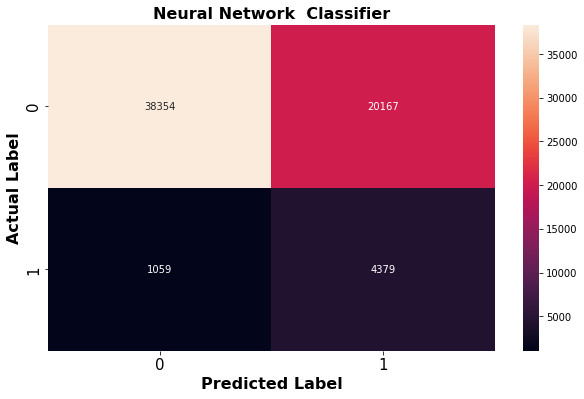

In [ ]:
# Confusion matrix
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  fig, ax = plt.subplots(figsize = (10,6), nrows = 1, ncols = 1)
  sns.heatmap(cm, ax = ax, annot = True, fmt = "d")
  ax.set_title('Neural Network  Classifier', fontsize = 16, fontweight = 'bold')
  ax.set_xlabel('Predicted Label', fontsize = 16, fontweight = 'bold')
  ax.set_ylabel('Actual Label', fontsize = 16, fontweight = 'bold')
  ax.tick_params(axis = 'both', labelsize = 15)

  print('NO - Heart Diseases Detected (True Negatives): ', cm[0][0])
  print('NO - Heart Diseases Incorrectly Detected (False Positives): ', cm[0][1])
  print('YES - Heart Diseases Missed (False Negatives): ', cm[1][0])
  print('YES - Heart Diseases Detected (True Positives): ', cm[1][1])
  print('Total Heart Diseases: ', np.sum(cm[1]))

plot_cm(y_valid, nn_valid_y_pred)

In [ ]:
new_pred = np.where(nn_valid_y_pred > 0.7, 1.0, 0.0)


# classification report
print('Neural Network Classifier')
print(classification_report(new_pred, y_valid))

Neural Network Classifier
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93     57351
         1.0       0.33      0.27      0.29      6608

    accuracy                           0.87     63959
   macro avg       0.62      0.60      0.61     63959
weighted avg       0.86      0.87      0.86     63959



In [ ]:
# Calculating Area Under Curve
nn_auc = roc_auc_score(y_valid, nn_valid_y_pred)

print('Neural Network: ROC AUC = %.3f' % (nn_auc))

Neural Network: ROC AUC = 0.797


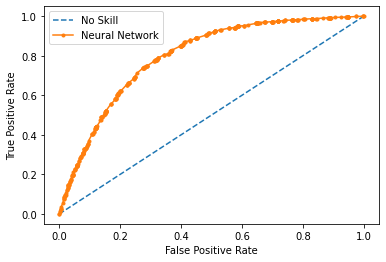

In [ ]:
nn_fpr, nn_tpr, thresholds = roc_curve(y_valid, nn_valid_y_pred)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(nn_fpr, nn_tpr, marker='.', label='Neural Network')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

**Important Remarks**




*   About the neural network model, it has a accuracy of 0.87. On the other hand, it has a goog ROC-AUC score, getting the value of 0.797.
*   The precision and the recall for the positive class is low.
*   We test various configurations of the network, changing the loss function, the optimizer function, addingg news layers, and all of them generate a model that gave worst results compared to the current model.




### Part 6: Comparing the models <a class="anchor" id="parte_06"></a>

**Analysis of the models**

| Confusion Matrix | TP   | TN    | FP    | FN   |
| -----------------|:-----|:------|:------|:-----|
| Naive 1          | 0    | 58237 |0      |5422  |
| Naive 2          | 446  | 53482 | 5055  | 4976 |
| Random Forest    | 4428 | 39835 | 18686 | 1010 |
| Logist Regresion | 4101 | 39463 | 19058 | 1337 |
| Neural Network   | 4379 | 38354 | 20167 | 1059 |

It is presented in Table above, the confusion matrix for all
models performed. Its possible to see that the best model for
true positive was random forest. For true negative was the
baseline as expected since the naive classifier 1 (predicts
zero for all) and 2 (predicts negative for most samples),
however they do not that in account the class imbalance.
The following best for true negative was random forest,
which also has the few false positive. The neural network
had the fewest false negative (worst case of error), however
the difference from random forest is very little.

Based on the Confusion Matrix metric, it is possible to
conclude that the random forest model presented the best
result

|Classification Report |Accuracy |Precision |Recall |F1-score|
|----------------------|:--------|:---------|:------|:-------|
|Baseline 1            |0.92     |0.00      |0.00   |0.00    |
Baseline 2             |0.84     |0.08      |0.08   |0.08    |
RandomForest           |0.69     |0.81      |0.19   |0.31    |
Logistic Regression    |0.68     |0.75      |0.18   |0.29    |
Neural Network         |0.87     |0.33      |0.27   |0.29    |


It is presented in table above, the Classification Report for
all models performed, considering the class 1, referent to
the label ”Yes” . For Accuracy metric, baseline 1 was better,
however this is a misleading result, since it the models did
not performed well for true labels, but mainly predicted right
the false cases. From the other models, the neural network
presented the highest value of 87%.

Precision is a good measure to determine when the costs
of False Positive is high. The best case is Random Forest
and secondly, we have the Logistic Regressions.
Recall calculates how many of the Actual Positives our
model capture through labeling it as Positive. All values are
low, and the best presented was from the Neural Network,
with 27%.

F1 Score is a function of Precision and Recall, better
metric to use if seeking a balance between Precision and
Recall and there is an uneven class distribution with a large
number of Actual Negatives, which is our case. The best
case was Random Forest, with 31%, follow by Logistic
Regression and Neural Network, both with 29%.

Based on the Classification Report metric, it is possible
to conclude that Random Forest model presented the best
result.

|Models               |ROC AUC|
|---------------------|:------|
|Baseline 1           |0.500  |
|Baseline 2           |0.498  |
|RandomForest         |0.818  |
|Logistic Regression  |0.779  |
|Neural Network       |0.797  |

t is presented in Table above, the ROC-AUC for all models
performed. For ROC-AUC the closest to 1, better is the
model, so for this analysis the best result was random forest
model, followed by neural network and logistic regression.
This result can also be observed in plot of the curves of ROC_AUC.

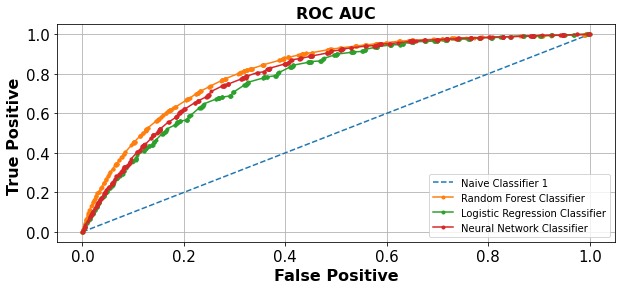

In [ ]:
fig, ax = plt.subplots(figsize = (10,4))

ax.plot(nv1_fpr, nv1_tpr, linestyle='--', label='Naive Classifier 1')
ax.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest Classifier')
ax.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression Classifier')
ax.plot(nn_fpr, nn_tpr, marker='.', label='Neural Network Classifier')

ax.set_title('ROC AUC', fontsize = 16, fontweight = 'bold')
ax.set_xlabel('False Positive', fontsize = 16, fontweight = 'bold')
ax.set_ylabel('True Positive ', fontsize = 16, fontweight = 'bold')
ax.tick_params(axis = 'both', labelsize = 15)
ax.grid(True)
ax.legend()
plt.show()

The result for baseline 1 and 2, proves the misleading
presented in previous metrics, since a no-skill classifier
should give a ROC AUC of 0.5 and our baseline models
presented values closed to this.

We can see above, the Random Forest Classifier - RFC, and the Neural Network Classifier - NNC, have a better ROC-AUC curve, with the RFC curve a little better than NNC. We can also see that by comparing the ROC-AUC score, the RFC had a score of 0.818 and the NNC had a score of 0.797.

### Part 7: Conclusions <a class="anchor" id="parte_07"></a>

It was presented the task of prediction of a heart disease in a person, based on key factor of her/his way of living, using the dataset *Key Indicators
of Heart Disease*. First the dataset was explored and a feature selection was performed in a search for the best set of feature to better solve this task. The best dataset was chosen and model by two main machine learning approaches, traditional machine Leaning methods (Naive Classifier, Naive Bayes, Logistic Regression, Random Forest) and deep learning method (Fully Connected Neural Network). The models were trained and analysed in a set of metrics. As the dataset is imbalance, the most reliable metric is ROC-AUC. Considering this, it is concluded that the best model for this task and this dataset is random forest with a ROC-AUC of 0.818.